# Preparing Data
This Jupyter Notebook is created to analyze Ford GoBike System Data. The data I downloaded here is between 2017 data.

In [1]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork', context='notebook', ticks=True, grid=False)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from IPython.display import display
%matplotlib inline

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
pd.options.display.max_columns = None

df = pd.read_csv("2017-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


This data may be enough for now, but I'd like to convert the start_time and end_time to datetime format

In [3]:
df['start_time'][0]

'2017-12-31 16:57:39.6540'

In [4]:
df['start_time'] = pd.to_datetime(df['start_time'], format='%Y-%m-%d %H:%M:%S')
df['end_time'] = pd.to_datetime(df['end_time'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [5]:
# Finding how many unique stations and bikes 
unique_stations, unique_bikes = df['start_station_name'].nunique(), df['bike_id'].nunique()
print('Amount of unique stations :', unique_stations)
print('Amount of unique bikes :', unique_bikes)

Amount of unique stations : 272
Amount of unique bikes : 3673


In [6]:
# Finding unique user types
print('User type availables :', df['user_type'].unique())

User type availables : ['Customer' 'Subscriber']


## What is the structure of this dataset?  
This dataset consisted of 519700 rows with 13 columns. Data types are mixed including object, integer, float, and datetime. 
There are 272 Stations with 3673 bikes. On the 'user_type' column, there are two unique values which are 'Customer' and 'Subscriber'

## What am I interested in this dataset?  
I'd like to know how customer's behavior based on some of the dataset. I'm going to do Feature Engineering as well.

# Univariate Visualization  
I'm going to analyze these columns to see how the distribution is :
- duration_sec
- start_time (Monthly)
- Top 5 start_station_name
- Top 5 end_station_name
- user_type  


## Amount of Customers Rental Duration in 2017
Because this column is quantitative variable, let's find its distribution

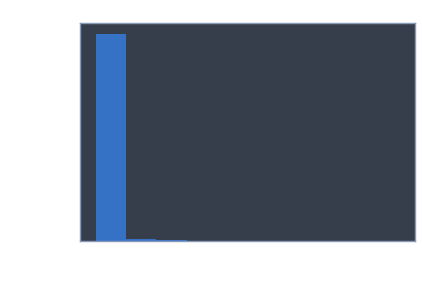

In [7]:
# Create figure
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot histogram
plt.hist(data=df, x='duration_sec')

# Set labels
ax.set_xlabel('Duration')
ax.set_ylabel('Amount')
plt.title('Amount of Customers Rental Duration in 2017');

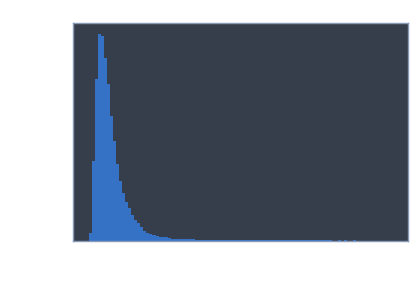

In [8]:
# Another plot with smaller bins and limits
# Create figure
fig = plt.figure()
ax = fig.add_subplot(111)

# specify bin size and maximum values
bins = np.arange(0, 10000+100, 100)

# Plot histogram
plt.hist(data=df, x='duration_sec', bins=bins)

# Set labels
ax.set_xlabel('Duration (second)')
ax.set_ylabel('Amount')
plt.title('Amount of Customers Rental Duration in 2017');

The distribution is heavily right skewed around 0 - 2000 seconds. I'm going to rescale the X-Axis using log scale

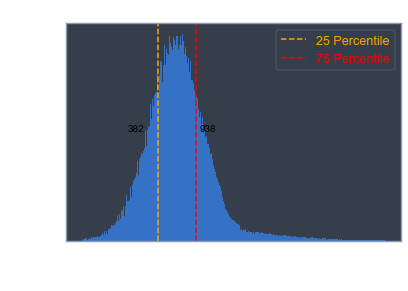

In [9]:
# Another plot in log scale
# Create figure
fig = plt.figure()

# specify bin size and maximum values
log_binsize = 1/100
bins = 10 ** np.arange(np.log10(df['duration_sec'].min()), np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

# Specify 0.25 and 0.75 percentiles
q25, q75 = np.percentile(df['duration_sec'], [25 ,75])

# Plot histogram
plt.hist(data=df, x='duration_sec', bins=bins)
plt.axvline(x=q25, color='orange', label='25 Percentile', linestyle='--')
plt.axvline(x=q75, color='red', label='75 Percentile', linestyle='--')

# Plot texts
plt.text(q25-200, 3950, int(q25), color='black')
plt.text(q75+100, 3950, int(q75), color='black')

# Set scale
plt.xscale('log')

# Set ticks
plt.xticks([100, 300, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 8e4], 
           ['100','300','500', '1k', '2k', '5k', '10k', '20k', '40k', '80k'])

# Set labels
plt.xlabel('Duration (second)')
plt.ylabel('Amount')
plt.title('Amount of Customers Rental Duration in 2017')
leg = plt.legend()
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())

Now the distrubution looks like a normal distribution. I added 25 Percentile and 75 Percentile line so we know that most of the customers rental duration within that range

## Amount of Monthly Rentals in 2017
Let's find out its Monthly rental distribution

In [10]:
df['month'] = df['start_time'].dt.month

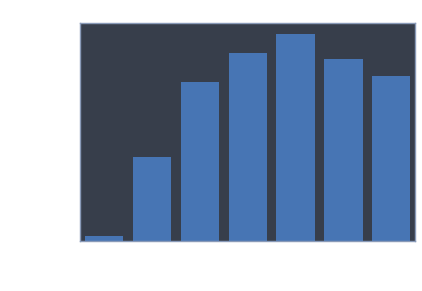

In [11]:
# set default color
default_color = sns.color_palette()[0]

# plot using seaborn countplot
ax = sns.countplot(data = df, x='month', color=default_color)

# set title and label name
ax.set_xlabel("Month (Number)")
ax.set_ylabel("Amount of Rentals")
ax.set_title("Amount of Monthly Rentals in 2017");

Apparently, this dataset contains since June until December 2017. But now we know the highest rental is in October

## Top 5 Start Station  
Let's find which station has the highest amount of start point to rent

In [12]:
top_5 = pd.DataFrame(df['start_station_name'].value_counts()[:5]).reset_index()
top_5.columns = ['start_station_name','total_rentals']

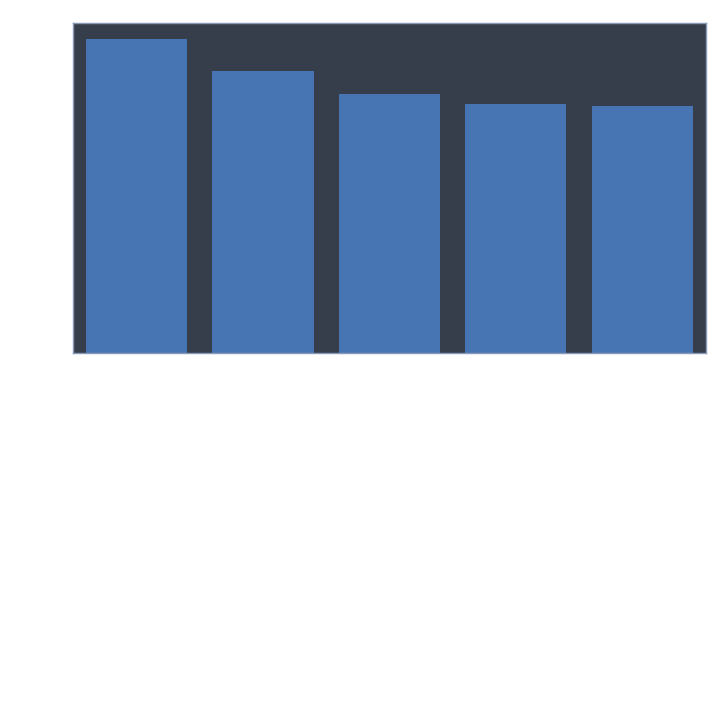

In [13]:
plt.figure(figsize=(10,10))
# set default color
default_color = sns.color_palette()[0]

# plot using seaborn countplot
ax = sns.barplot(data = top_5, x='start_station_name', y='total_rentals', color=default_color)

# set title and label name
ax.set_xlabel("Start Station Name")
ax.set_ylabel("Amount of Rentals")
ax.set_title("Top 5 Start Station in 2017")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout();

It looks like San Francisco Ferry Building (Harry Bridges Plaza) Station has the highest amount of rentals in 2017. Maybe someone else can investigate further why this happened. It could be the location, the service, available bikes, and much more

## Top 5 End Station

In [14]:
top_5 = pd.DataFrame(df['end_station_name'].value_counts()[:5]).reset_index()
top_5.columns = ['end_station_name','total_rentals']

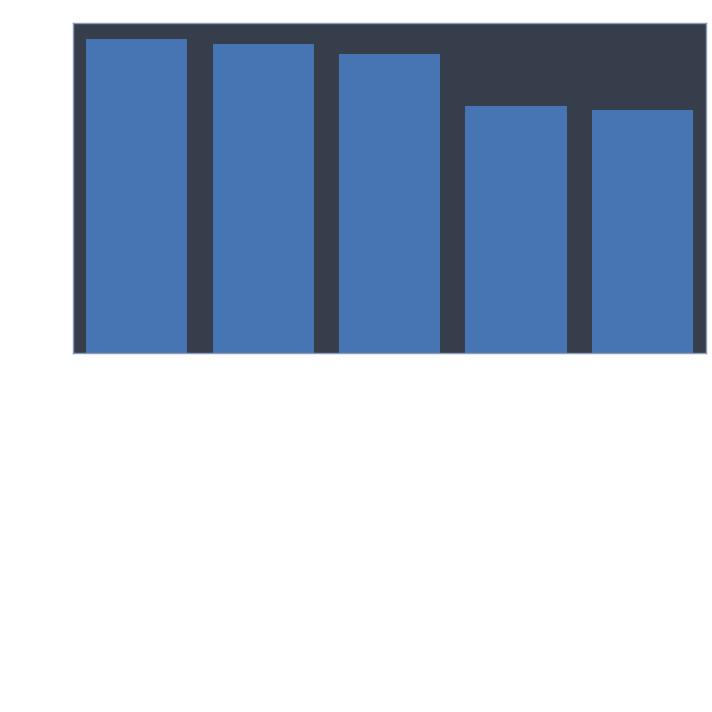

In [15]:
plt.figure(figsize=(10,10))
# set default color
default_color = sns.color_palette()[0]

# plot using seaborn countplot
ax = sns.barplot(data = top_5, x='end_station_name', y='total_rentals', color=default_color)

# set title and label name
ax.set_xlabel("End Station Name")
ax.set_ylabel("Amount of Rentals")
ax.set_title("Top 5 End Station in 2017")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout();

Looks like the top 3 of End Station is much higher then the highest of Start Station rents. This is interesting since the top 3 could be the most favored destination by customers

## Finding User Type Distribution

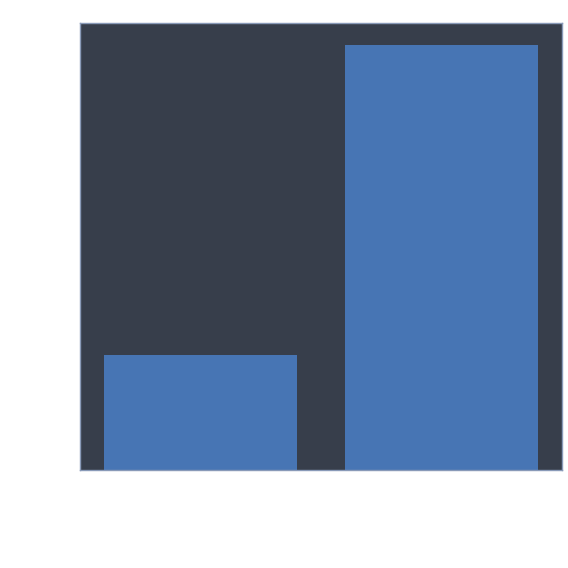

In [16]:
plt.figure(figsize=(8,8))

# set default color
default_color = sns.color_palette()[0]

# plot using seaborn countplot
ax = sns.countplot(data = df, x='user_type', color=default_color)

# set title and label name
ax.set_xlabel("User Type")
ax.set_ylabel("Amount of Rentals")
ax.set_title("Total Rents of User Type Category in 2017")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout();

Well actually I didn't expect this. I thought that Customer (that is not a Subscriber) would have a higher amount of total rents. But this is good for the business, as a higher subscriber would mean a higher revenue. Note that this tells us the dataset (based on user_type column) is imbalanced.

## Were there any transformation must be done?  
There was a transformation (without changing the dataframe contents) by changing the scale from linear to log scale on duration_sec column. This way, I could see that the distribution is normal

## Were there any outliers? Should i remove them?
There is some outliers here. If we take a look that the first histogram plot about duration_sec column, there are the outliers. The initial x-axis plot would reach 80k+ seconds. 80k seconds would mean over than 20 hours. I don't really know how the business policy yet, but I don't think someone would use a bike for 20 hours (except if someone parked the bike and forgot to return it early).  
From now on, I'll remove outliers from dataframe

In [17]:
Q1 = df['duration_sec'].quantile(0.25)
Q3 = df['duration_sec'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
new_df = df[(df['duration_sec']>=lower) & (df['duration_sec']<=upper)].reset_index(drop=True)
new_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month
0,1544,2017-12-31 23:53:38.943,2018-01-01 00:19:23.047,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,558,Subscriber,12
1,1474,2017-12-31 23:54:40.146,2018-01-01 00:19:14.351,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,3646,Subscriber,12
2,1397,2017-12-31 23:55:09.686,2018-01-01 00:18:26.721,78,Folsom St at 9th St,37.773717,-122.411647,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1667,Customer,12
3,1532,2017-12-31 23:52:49.497,2018-01-01 00:18:21.953,78,Folsom St at 9th St,37.773717,-122.411647,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3114,Subscriber,12
4,1216,2017-12-31 23:46:33.993,2018-01-01 00:06:50.058,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,123,Folsom St at 19th St,37.760594,-122.414817,1473,Subscriber,12


In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482736 entries, 0 to 482735
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             482736 non-null  int64         
 1   start_time               482736 non-null  datetime64[ns]
 2   end_time                 482736 non-null  datetime64[ns]
 3   start_station_id         482736 non-null  int64         
 4   start_station_name       482736 non-null  object        
 5   start_station_latitude   482736 non-null  float64       
 6   start_station_longitude  482736 non-null  float64       
 7   end_station_id           482736 non-null  int64         
 8   end_station_name         482736 non-null  object        
 9   end_station_latitude     482736 non-null  float64       
 10  end_station_longitude    482736 non-null  float64       
 11  bike_id                  482736 non-null  int64         
 12  user_type       

Still a lot of rows and this way will be safer for Bivariate and Multivariate Visualization

# Bivariate Visualization

## duration_sec vs distance  
So there is no distance column yet, but I'll create one using geopy based on coordinates of Start Station and End Station

In [19]:
def find_distance(start_lat,start_lon,end_lat,end_lon):
    from geopy.distance import distance
    
    coords_1 = (start_lat, start_lon)
    coords_2 = (end_lat, end_lon)

    return distance(coords_1, coords_2).m

new_df['distance']= np.vectorize(find_distance)(new_df['start_station_latitude'], 
                                                new_df['start_station_longitude'], 
                                                new_df['end_station_latitude'], 
                                                new_df['end_station_longitude'])
new_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,distance
0,1544,2017-12-31 23:53:38.943,2018-01-01 00:19:23.047,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,558,Subscriber,12,1050.382033
1,1474,2017-12-31 23:54:40.146,2018-01-01 00:19:14.351,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,3646,Subscriber,12,1050.382033
2,1397,2017-12-31 23:55:09.686,2018-01-01 00:18:26.721,78,Folsom St at 9th St,37.773717,-122.411647,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1667,Customer,12,2854.592581
3,1532,2017-12-31 23:52:49.497,2018-01-01 00:18:21.953,78,Folsom St at 9th St,37.773717,-122.411647,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3114,Subscriber,12,2854.592581
4,1216,2017-12-31 23:46:33.993,2018-01-01 00:06:50.058,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,123,Folsom St at 19th St,37.760594,-122.414817,1473,Subscriber,12,2854.424856


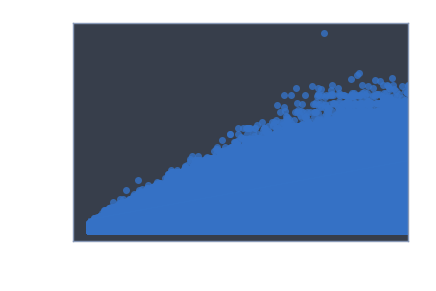

In [20]:
# Scatter Plot of duration_sec and distance
# set default color
default_color = sns.color_palette()[0]

# plot using seaborn countplot
ax = sns.regplot(data = new_df, 
                 x='duration_sec', 
                 y='distance', 
                 color=default_color)
                             
# set title and label name
ax.set_xlabel("Duration (Second)")
ax.set_ylabel("Distance (Meters)")
ax.set_title("Distance(Meters) vs Duration(Second) Distrubution in 2017");

The point seems cramped. I'm going to use regplot, change alpha parameter, and change the scatterplot color to see it more clearly 

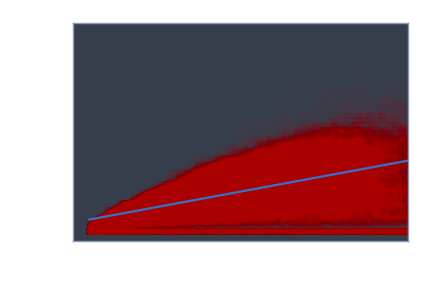

In [21]:
# Scatter Plot of duration_sec and distance with changed alpha
# set default color
default_color = sns.color_palette()[0]

# plot using seaborn countplot
ax = sns.regplot(data = new_df, 
                 x='duration_sec', 
                 y='distance', 
                 color=default_color, 
                 scatter_kws={'alpha':0.01, 'color':'red'})

# set title and label name
ax.set_xlabel("Duration (Second)")
ax.set_ylabel("Distance (Meters)")
ax.set_title("Distance(Meters) vs Duration(Second) Distrubution in 2017");

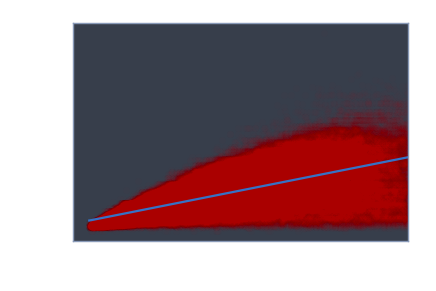

In [22]:
above_0_dist_df = new_df.query("distance > 0")
# Scatter Plot of duration_sec and distance with changed alpha
# set default color
default_color = sns.color_palette()[0]

# plot using seaborn countplot
ax = sns.regplot(data = above_0_dist_df, 
                 x='duration_sec', 
                 y='distance', 
                 color=default_color, 
                 scatter_kws={'alpha':0.01, 'color':'red'})

# set title and label name
ax.set_xlabel("Duration (Second)")
ax.set_ylabel("Distance (Meters)")
ax.set_title("Distance(Meters) vs Duration(Second) Distrubution in 2017");

In [23]:
print("Correlation :",new_df[['duration_sec','distance']].corr()['duration_sec']['distance'])
print("Correlation :",above_0_dist_df[['duration_sec','distance']].corr()['duration_sec']['distance'])

Correlation : 0.6777448458281412
Correlation : 0.7297754098505669


While most of the rents have the same Start and End station (where the distance is 0), some of the points shows a high and positive correlation. This makes sense while someone traveled so far would mean a longer duration needed

## Qualitative vs Quantitative Variables
For this section, I will use above_0_dist_df dataframe. I'd like to see the distribution between these Qualitative vs Qualitative variables. The columns would be :
 - duration_sec (quantitative)
 - distance (quantitative)
 - user_type (qualitative)

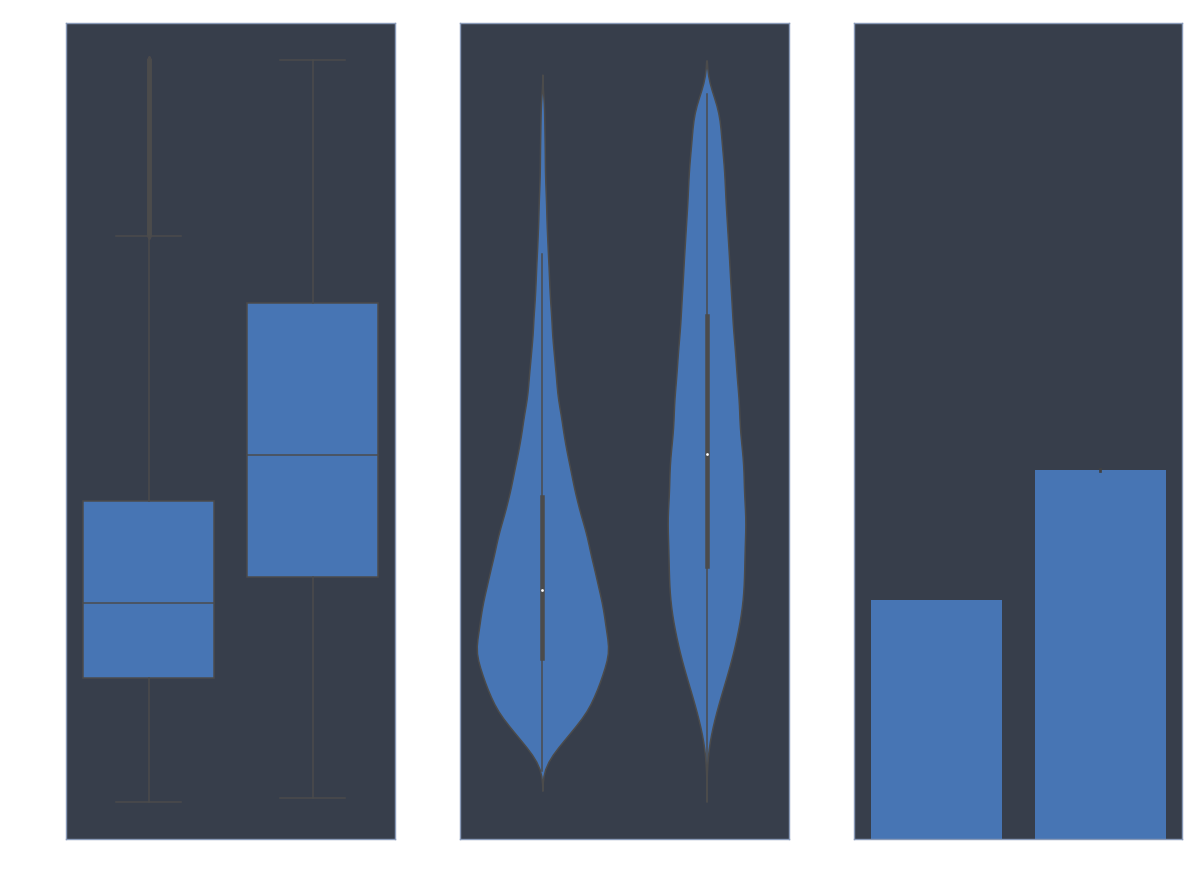

In [24]:
# Create figure
f, axes = plt.subplots(1, 3, figsize=(20, 15))

# set default color
default_color = sns.color_palette()[0]

# plot using seaborn
sns.boxplot(data=above_0_dist_df, x='user_type', y='duration_sec',ax=axes[0], color=default_color)
sns.violinplot(data=above_0_dist_df, x='user_type',y='duration_sec', ax=axes[1], color=default_color)
sns.barplot(data=above_0_dist_df, x='user_type', y='duration_sec',ax=axes[2], color=default_color)

axes[0].set_title("User Type vs Duration (Second) Boxplot in 2017")
axes[1].set_title("User Type vs Duration (Second) Violinplot in 2017")
axes[2].set_title("User Type vs Duration (Second) Barchart in 2017")
axes[0].set_xlabel("User Type")
axes[1].set_xlabel("User Type")
axes[2].set_xlabel("User Type")
axes[0].set_ylabel("Duration (second)")
axes[1].set_ylabel("Duration (second)")
axes[2].set_ylabel("Average Duration (second)")
axes[2].set_ylim((0, 2000));

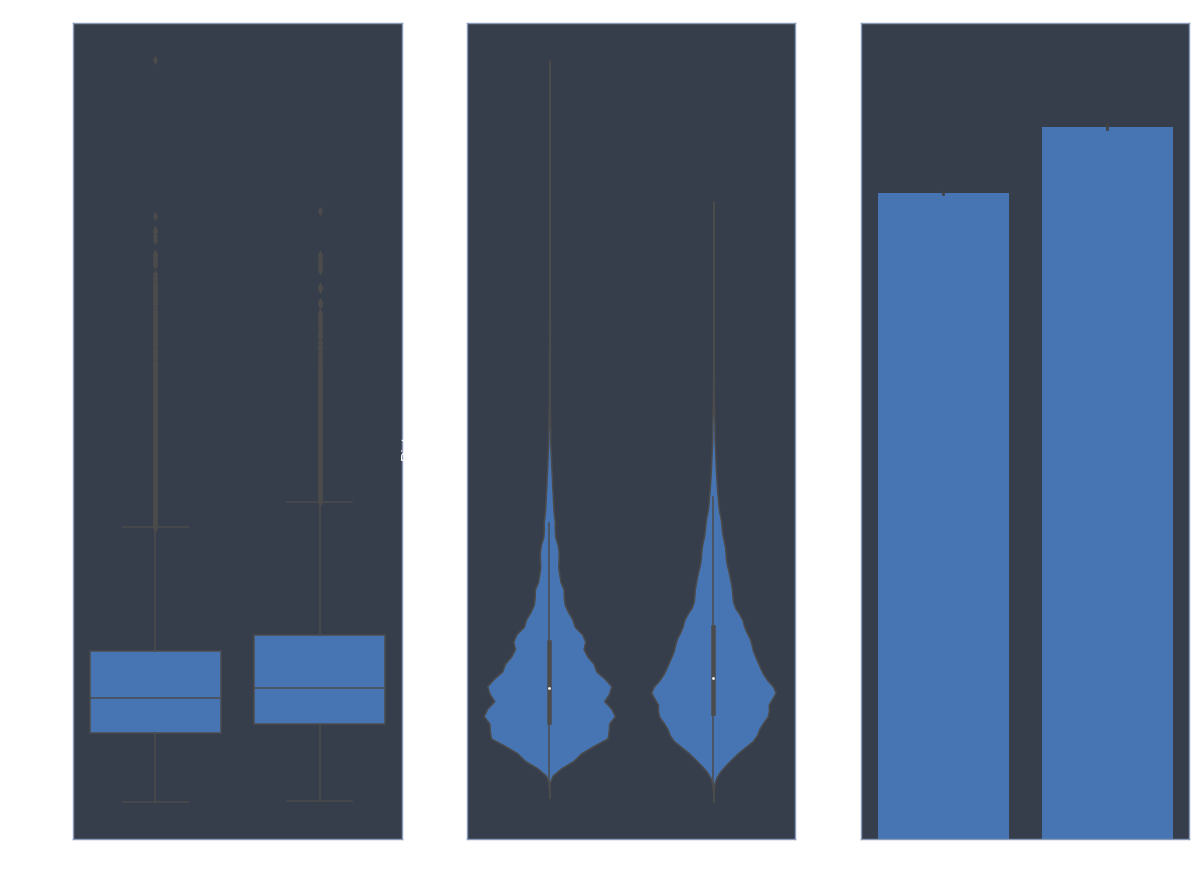

In [25]:
# Create figure
f, axes = plt.subplots(1, 3, figsize=(20, 15))

# set default color
default_color = sns.color_palette()[0]

# plot using seaborn
sns.boxplot(data=above_0_dist_df, x='user_type', y='distance',ax=axes[0], color=default_color)
sns.violinplot(data=above_0_dist_df, x='user_type',y='distance', ax=axes[1], color=default_color)
sns.barplot(data=above_0_dist_df, x='user_type', y='distance',ax=axes[2], color=default_color)

axes[0].set_title("User Type vs Duration (Second) Boxplot in 2017")
axes[1].set_title("User Type vs Duration (Second) Violinplot in 2017")
axes[2].set_title("User Type vs Duration (Second) Barchart in 2017")
axes[0].set_xlabel("User Type")
axes[1].set_xlabel("User Type")
axes[2].set_xlabel("User Type")
axes[0].set_ylabel("Distance")
axes[1].set_ylabel("Distance")
axes[2].set_ylabel("Average Distance (meter)")
axes[2].set_ylim((0, 2000));

**Duration vs User Type**  
It looks like Customer type tends to rent longer than Subscriber. This is shown by all kind of plots including its average. But the Violin Plot tells us that Customer type is much more distributed than Subscriber type.  

**Distance vs User Type**  
It looks like Customer type tends to have higher distance as well based Box Plot and Bar Chart. While on the Violin Plot, it tells us that the distribution is similar between two user types, except that Subscriber Type have a larger range. 

Note that the amount of Customer and Subscriber is imbalanced (based on the univariate user_type plot), but here we use the data we currently have for now.

## Were there any relationship on any variables?  
If we're talking about quantitative relationship variables, then yes there was. The correlation coeffiecient of duration_sec and distance column is above than 0.5, which means a highly correlated variables. Remember that correlation doesn't mean causation. But it does make sense that the further user travels (In this case, the travel distance is Start Station and End Station), the higher the duration would be.

## Were there anything interesting on the User Type column vs Quantiatives?  
I found that the Customer type tends to rent longer than Subscriber, and Customer type tends to travel longer as well. Note that the travel measured by the Start Station and End Station. The duration_sec distribution of Customer type seems to be more distributed too, compared to Subscriber type that have a lower median.

# Multivariate Visualization  
In this section, I will use above_0_dist_df dataframe again. It looks like I dropped not even 10% of the whole data yet, so I think it's still safe to do so.

In [26]:
above_0_dist_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,distance
0,1544,2017-12-31 23:53:38.943,2018-01-01 00:19:23.047,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,558,Subscriber,12,1050.382033
1,1474,2017-12-31 23:54:40.146,2018-01-01 00:19:14.351,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,3646,Subscriber,12,1050.382033
2,1397,2017-12-31 23:55:09.686,2018-01-01 00:18:26.721,78,Folsom St at 9th St,37.773717,-122.411647,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1667,Customer,12,2854.592581
3,1532,2017-12-31 23:52:49.497,2018-01-01 00:18:21.953,78,Folsom St at 9th St,37.773717,-122.411647,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3114,Subscriber,12,2854.592581
4,1216,2017-12-31 23:46:33.993,2018-01-01 00:06:50.058,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,123,Folsom St at 19th St,37.760594,-122.414817,1473,Subscriber,12,2854.424856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482731,435,2017-06-28 10:00:54.528,2017-06-28 10:08:10.438,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber,6,1238.684548
482732,431,2017-06-28 09:56:39.631,2017-06-28 10:03:51.090,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber,6,923.270011
482733,424,2017-06-28 09:47:36.347,2017-06-28 09:54:41.187,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber,6,1072.790982
482734,366,2017-06-28 09:47:41.664,2017-06-28 09:53:47.715,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber,6,243.399734


In [27]:
print("Percentage of dropped data :",np.round((len(df) - len(above_0_dist_df)) / len(df) * 100, 2),"%")

Percentage of dropped data : 8.91 %


## month vs user_type vs duration_sec  
Let's take a look how the data distributes based on these 3 columns

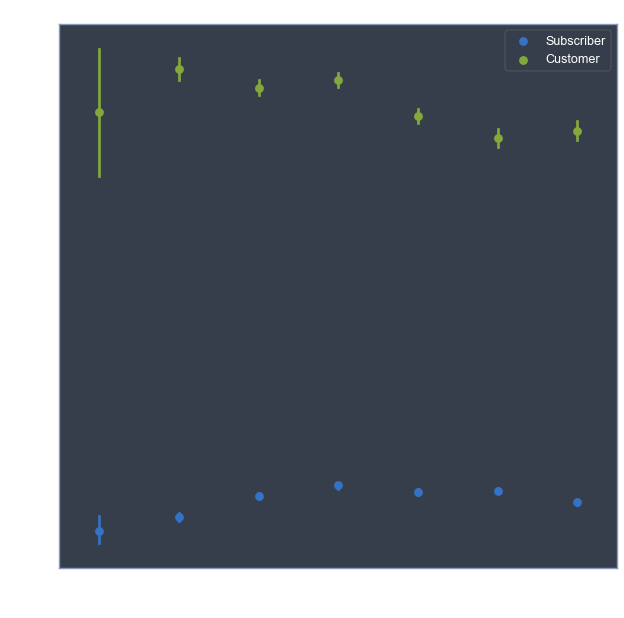

In [28]:
plt.figure(figsize=(10,10))
sns.pointplot(x='month', y='duration_sec', hue='user_type', data=above_0_dist_df, linestyles = '')
plt.xlabel('Month')
plt.ylabel('Duration(Second)')
leg = plt.legend()
plt.title('Monthly Average Duration(Second) by User Type in 2017');

It seems there aren't significant difference between months on each user type. We still found the same thing that Customer tends to rent longer than Subscriber. Even though the data is imbalanced, the average duration of Customer type is still higher every month.

## month vs user_type vs distance

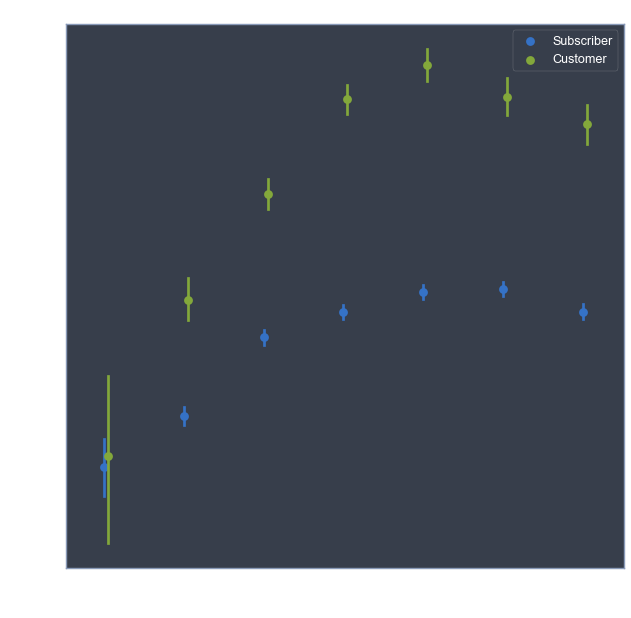

In [29]:
plt.figure(figsize=(10,10))
sns.pointplot(x='month', y='distance', hue='user_type', data=above_0_dist_df, linestyles = '', dodge=True)
plt.xlabel('Month')
plt.ylabel('Average Distance(Meters)')
leg = plt.legend()
plt.title('Monthly Average Distance(Meters) by User Type in 2017');

This tells us differently compared to the previous plot. It tends to get higher every month based on the above plot. Could it be when Autumn season had come, people would likely to ride further? People doesn't ride far in the summer though.

## Were there anything wrong within the data?  
The confidence interval of the pointplot in June seems to be much larger than the other months. It's not because the data is wrong. It's just the number of rows in June seems to be very low compared to the other months.

In [30]:
above_0_dist_df['month'].value_counts()

10    100491
11     89007
9      88806
12     80569
8      73986
7      38117
6       2424
Name: month, dtype: int64

That's why the estimator isn't very "confident" and therefore makes a large confidence interval. 

## Were there any features that strengthened each other?  
It looks like in the Autumn season, people would likely to ride further compared to in the summer season (winter isn't included because there's only 1 month of winter). But this doesn't prove on the duration though. In average, people tends to ride in about 15 minutes no matter in which months.

This concludes everything for now. Thank you for viewing this Notebook!